# Sentiment Analysis


In this lesson, we're going to learn how to use [VADER](https://github.com/cjhutto/vaderSentiment), an English-language sentiment analysis tool designed for use with social media texts. This tool helps to calculate whether texts express positive or negative sentiment.

In this lesson, we will learn how to use VADER to:
- Calculate sentiment for individual sentences, tweets, and a fairy tale
- Make plots of how sentiment fluctuates over time and throughout a text
---

## Acknowledgement

The following tutorial is almost entirely copied from Melanie Walsh's [Sentiment Analysis lesson](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html). This tutorial differs from Walsh's lesson primarily in the datasets used. Additional steps were added for working with JSON data and web scraping a text file.

---

## Datasets

We are going to analyze tweets related to the Biden Administration's student loan forginess program. You can download the dataset [here](https://drive.google.com/drive/u/0/folders/15MC7UJd5Sz0hSKqY2XsFUbFbAM-t065a).

We are also going to analyze President Biden's 2023 State of the Union Address, which we will web scrape from the White House website. 



## What is Sentiment? What Exactly Are We Measuring?

What is sentiment analysis, exactly? What are we actually measuring with VADER?

These are tough and important questions. According to VADER's creators, C.J. Hutto and Eric Gilbert, "Sentiment analysis, or opinion mining, is an active area of study in the field of natural language processing that analyzes people's **opinions, sentiments, evaluations, attitudes, and emotions** via the computational treatment of subjectivity in text" (["VADER"](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)).

I would like to emphasize that "opinions, sentiments, evaluations, attitudes, and emotions" covers a *lot* of ground. These are complex categories of human experience that can be expressed in many different ways, especially in different contexts. In fact, that's why Hutto and Gilbert designed VADER specifically for *social media* texts, because sentiment gets expressed differently in social media posts than in, say, fictional stories or newspaper articles.

We want to remain critical and self-reflexive about what exactly we are measuring with VADER — especially when we apply VADER to non-social media texts, as we will with "Little Red-Cap" below. Too often I have encountered well-meaning students who want to understand complex social or textual phenomena (e.g., mental health, a reader's emotional experience of a story, opinions about climate change) by reducing it only to sentiment analysis scores, without doing more and without thinking more deeply about whether those scores actually capture what they're interested in.

So, yes, tools like VADER can be useful, as we will see below, but they are only useful when thoughtfully and deliberately applied.

## How VADER Was Built and How It Works

VADER, which stands for **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner, calculates the sentiment of texts by referring to a lexicon of words that have been assigned sentiment scores as well as by using a handful of simple rules.

You can read more about how VADER was designed in [C.J. Hutto and Eric Gilbert's published paper](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122), but here's a summary version: VADER's lexicon was created by enlisting 10 different people to rate thousands of words positively or negatively on a scale of -4 to 4 (you can scroll through the [lexicon on GitHub](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) and check it out for yourself — each line consists of a word, the mean rating, standard deviation, and 10 individual human ratings).

[![](../images/VADER-fig.png)](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)

*This figure shows the interface presented to the 10 raters for rating the sentiment of words. It is taken from ["VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text."](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)* 

For example, you can see that the acronym [ROFL](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L368) (Rolling on the Floor Laughing) has a mean rating of 2.7, the word [*crappy*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1622) has a mean rating of -2.5, and the word [*bliss*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1127) has a mean rating of 2.7. If you look at the 10 individual ratings for each entry, however, you can see interesting discrepancies. One person rated *bliss* as a 4, while another person rated *bliss* as a 1. Just how "positive" is the word *bliss*? What do *you* think?

What about [*cutesie*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1721)? It has a mean rating of 1, but two people rated it as a -1, and five people rated as a 2. Is *cutesie* an admiring adjective — "[She was so cutesie I just had to talk to her](https://www.urbandictionary.com/define.php?term=Cutesie)" — or a diminutive slight — "Ugh, her apartment was too cutesie"?

These difficult questions come up repeatedly when you read through the lexicon. Of course, VADER is designed to generalize beyond individual responses and interpretations, and it is not expected to capture the nuances of every single text. At the same time, whenever we use sentiment analysis tools, we want to ask: Does it matter that we're missing out on specific nuances? Is this the best tool for capturing what we're trying to study and understand?

In addition to its lexicon, VADER also calculates sentiment by considering 5 relatively simple rules:

> 1. If there's punctuation, especially exclamation points, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is bliss!!!" 👍👍👍 )

> 2. If there's capitalization, especially all caps, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is BLISS" 👍👍👍 )

> 3. If there are words like "extremely" or "absolutely", the sentiment should be increased ("Mochi ice cream is good" 👍  vs "Mochi ice cream is extremely good" 👍👍👍 )

> 4. If there's a "but" in a sentence, the polarity of the sentiment should shift, and the sentiment that follows the "but" should be prioritized (e.g., "Mochi ice cream is nice" 👍 vs "Mochi ice cream is nice, but it's a little blah" 👎 )

> 5. If there's a negation before an important word, the sentiment polarity should be flipped ("Mochi ice cream is my favorite" 👍 vs "Mochi ice cream is not my favorite" 👎 )


Because VADER uses this lexicon and these simple rules, it works very fast and doesn't require any training or set up, unlike more sophisticated machine learning approaches. The simplicity is both its pro and con.

## Install and Import Libraries/Packages


So let's explore VADER!

To use it, we need to install the [vaderSentiment package](https://github.com/cjhutto/vaderSentiment) with pip.

In [67]:
# !pip install vaderSentiment

In [68]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

We are also going to import pandas for working with data and set the column width for pandas DataFrames to 400.

In [69]:
import pandas as pd
pd.options.display.max_colwidth = 400

## Calculate Sentiment Scores

To calculate sentiment scores for a sentence or paragraph, we can use `sentimentAnalyser.polarity_scores()` and input a string of text.

This method returns a Python dictionary of sentiment scores: how negative the sentence is between 0-1, how neutral the sentence is between 0-1, how positive the sentence is between 0-1, as well as a compound score between -1-1.

Most scholars uses the compound score to represent sentiment in their analyses, and we will use the compound score in this lesson, as well. Let's test it out with some sample sentences! 

In [70]:
sentimentAnalyser.polarity_scores("I like the Marvel movies")

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

In [71]:
sentimentAnalyser.polarity_scores("I don't like the Marvel movies")

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.5334}

In [72]:
sentimentAnalyser.polarity_scores("I despise the Marvel movies with every fiber of my being")

{'neg': 0.169, 'neu': 0.634, 'pos': 0.197, 'compound': 0.1027}

In [73]:
sentimentAnalyser.polarity_scores("I don't *not* like the Marvel movies")

{'neg': 0.255, 'neu': 0.546, 'pos': 0.199, 'compound': -0.1307}

To make the scores more readable, below we make a list of sentences, loop through the list and calculate the polarity scores for each sentence, then print out each part of the sentiment scores dictionary in a nicely formatted f-string (a string that begins with f and allows you to insert Python variables).

In [74]:
# List of sentences
sentences = ["I like the Marvel movies",
             "I don't like the Marvel movies",
             "I despise the Marvel movies with every fiber of my being",
             "I don't *not* live the Marvel movies"]

# Loop through list of sentences
for sentence in sentences:
    # Run VADER on each sentence
    sentiment_scores = sentimentAnalyser.polarity_scores(sentence)
    
    # Print scores for each sentence
    print(f"""'{sentence}' \n
🙁 Negative Sentiment: {sentiment_scores['neg']} \n  
😐 Neutral Sentiment: {sentiment_scores['neu']} \n
😀 Positive Sentiment: {sentiment_scores['pos']} \n
✨ Compound Sentiment: {sentiment_scores['compound']} \n
--- \n""")

'I like the Marvel movies' 

🙁 Negative Sentiment: 0.0 
  
😐 Neutral Sentiment: 0.361 

😀 Positive Sentiment: 0.639 

✨ Compound Sentiment: 0.6486 

--- 

'I don't like the Marvel movies' 

🙁 Negative Sentiment: 0.526 
  
😐 Neutral Sentiment: 0.474 

😀 Positive Sentiment: 0.0 

✨ Compound Sentiment: -0.5334 

--- 

'I despise the Marvel movies with every fiber of my being' 

🙁 Negative Sentiment: 0.169 
  
😐 Neutral Sentiment: 0.634 

😀 Positive Sentiment: 0.197 

✨ Compound Sentiment: 0.1027 

--- 

'I don't *not* live the Marvel movies' 

🙁 Negative Sentiment: 0.28 
  
😐 Neutral Sentiment: 0.72 

😀 Positive Sentiment: 0.0 

✨ Compound Sentiment: -0.3252 

--- 



We can see moments where VADER is both working and not working in the examples above. VADER registers that "I like the Marvel movies" represents the overall most positive sentiment, while "I don't like the Marvel movies" is the most negative sentiment, and "I don't *not* like the Marvel movies" is negative but not quite as negative as a straight up "don't like."

However, VADER does not capture that "I despise the Marvel movies with every fiber of my being" should be the *most* negative sentiment of the bunch. In fact, VADER scores this sentence in the mildly positive range. This example should remind us that VADER typically works best when it is used in aggregate and applied to many examples, such that specific nuances and exceptions like these matter less and come out in the wash.

## Calculating Sentiment Scores: Student Debt Relief related tweets

Let's try using VADER on tweets related to the Biden Administration's student loan forginess program. You can download the dataset [here](https://drive.google.com/drive/u/0/folders/15MC7UJd5Sz0hSKqY2XsFUbFbAM-t065a).

### Load the dataset

We will load the Student Debt Relief JSON file with pandas and drop some of the columns that we don't need.

In [75]:
tweets_df = pd.read_json('student_loan_json.jsonl', orient='split', convert_dates = True,
                       keep_default_dates = ['created_at'])

In [76]:
tweets_df.rename(columns={'created_at': 'date',
                          'public_metrics.retweet_count': 'retweets'},
                            inplace=True)

In [77]:
tweets_df = tweets_df[['date', 'text', 'retweets']]

In [78]:
tweets_df

,date,text,retweets
0,2023-02-28 23:59:42,Bye bye student loan relief program maybe this will get more young people involved in politics my Twitter childrens @SamCaoOhio @MFXM99 @EthanNichols02 @voteholt @itscorrena and future Twitter son @ScorpiaStunning already are that's why their in my family\nhttps://t.co/s7YOZ8jt6s,0
1,2023-02-28 23:58:17,Now let's take the merits of funding Ukrainian pensions to the supreme court with treason against anyone threatening to cut US social security or Medicare who voted to fund Ukrainian pensions.\n\nThose in support should ever utter cutting US anything again.\n\n#studentloanforgiveness,0
2,2023-02-28 23:55:59,"Today, U.S. Secretary of Education Miguel @SecCardona issued the following statement after the conclusion of oral arguments before the Supreme Court on the Department’s one-time student debt relief program:\nhttps://t.co/aDF6NDUNji",0
3,2023-02-28 23:50:47,Student Loan Forgiveness updates…#TikTok https://t.co/KOF5XsN6Be,0
4,2023-02-28 23:43:25,My dad and his pup Jax - 6m old #GermanShepherds #dad #photography #Kansas #studentloanforgiveness https://t.co/eI8cCsXOHQ,0
...,...,...,...
10178,2022-08-01 17:50:46,@desmondalan What was her plan to cancel student debt? What actions would she have taken? Would it have worked?,0
10179,2022-08-01 17:41:52,@desmondalan You think Republicans will cancel your student loan debt? Bizarre thinking. Also bizarre that with everything going on in this country you choose to be a single item voter. Seems you only care about yourself,0
10180,2022-08-01 17:25:14,"@mdsmlee @TomCottonAR The new big lie is that government stimulus checks, covid relief funds,student debt cancellation, and child tax credits---all of which benefitted 75% of the middle class and 140 million poor and low income people --caused inflation.\n\nNevermind corporate tax breaks and loopholes.",0
10181,2022-08-01 16:29:44,@leilacleigh @RedBeretsM4All Cancel medical and student debt,0


### Calculate Sentiment for All Rows in a Dataframe

To calculate the sentiment for each tweet in the dataframe and add a new column that contains this information, we will create a function that will take in any text and output the compound sentiment score.

In [79]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Let's test it out!

In [80]:
calculate_sentiment('I like the Marvel movies')

0.6486

Nice, it works! Now we can apply it to every row in the dataframe with the `.apply()` method. In the same line of code, we are making new column "sentiment_score", where we are outputting our results.

In [81]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
tweets_df['sentiment_score'] = tweets_df['text'].apply(calculate_sentiment)

Let's sort the DataFrame and examine the top 10 tweets with the highest compound sentiment.

In [82]:
tweets_df.sort_values(by='sentiment_score', ascending=False)[:10]

,date,text,retweets,sentiment_score
1617,2022-11-12 16:40:51,"The student loan forgiveness plan is illegal. For all the idiots who voted for Biden's democrats thinking they'd beat the system. I have a message for you. Ready?🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣 ok, that's enough",0,0.9993
7245,2022-08-25 12:44:27,🤣🤣🤣🤣🤣🤣🤣😂😂😂😂🤣🤣🤣😀🤣😀#studentloanforgiveness #thursdayvibes Happy Thursday https://t.co/91ErDTlFLM,0,0.9947
6338,2022-08-26 01:03:20,Cute Or Inappropriate? 😮 ♥️\n⬇️ FEATURES ⬇️\nhttps://t.co/AYXiMbW1xL\nCashApp - $NinaMarieRosa\nVenmo - MixedKiids\n♥️♥️♥️♥️♥️\nFOLLOW US ON INSTAGRAM\nhttps://t.co/sGHrmk7BBo\n♥️♥️♥️♥️♥️\nLIKE US ON FACEBOOK\nMixed Kiids\n#الهلال_الخليج #قرعه_دوري_ابطال_اوروبا #studentloanforgiveness https://t.co/flkaAIVK4d,0,0.9946
2487,2022-10-23 01:02:46,Republicans blocking student debt relief in court \n\nVOTE BLUE💙🌊💙🌊💙🌊💙🌊💙🌊💙🌊💙🌊💙🌊,1,0.9878
7483,2022-08-25 04:28:16,@GOP\nGiving student loan forgiveness not only encourages and helps the middle and lower class to get a higher education.. but also because of this it makes our economy better for ALL AMERICANS 💙💙💙💙,1,0.9850
532,2023-01-18 05:50:09,@DaniScotchIrish @1414Maple @PlantLadyAmy @jodikyman @sawsharee @TileTony @WalterLapp @Brindle_Girly @MarilynCapps11 @suziferg0806 @ALCinnamonGirl @CodeNamePeabody @deaconcruise @katz_mum @catincoggnito @TimothyPSmith7 @Pulpolover @AmBeachy @UDOU50417543 @ret_cw3 @In2019Porge @cachobweeney @MNTwinsFan47 @Dlstoke @Gatoram15 @Courtness1975 @pauls_tweetisms @desaidi9 @TexHellCat @txhighdudgeon @M...,1,0.9831
4129,2022-09-20 03:32:51,"Just saw \n .@MikeDeWine's ad.\n\nHe's stealing #credit \nfor JOE BIDEN's \nStudent Loan Forgiveness and for JOE BIDEN's Infrastructure bill.\n\nBills that \n#Mike OPPOSED. \n🙄🙄🤬🤬\n\nELECT\n#NanWHALEY\nFor\nGOVERNOR,\n#OHIO!!\n\n💙💙💙🙋‍♀️👍💙💙💙 https://t.co/uvyApuv3PF",0,0.9814
7091,2022-08-25 14:34:51,My heart is SO SO happy learning how many of my friends are getting their student loans forgiven thanks to Biden administration. Don’t ever let someone tell you that voting doesn’t matter! 💙 #studentloanforgiveness,0,0.9783
4997,2022-08-29 22:56:11,"President Biden is doing a great job. The student loan forgiveness will help middle class Americans and help stimulate the economy. Mace only wants benefits for the wealthy!! Vote Blue to keep your social security, women’s rights, gun reform and progress!!💙🌊🌊🌊 https://t.co/SyiB6fXGns https://t.co/2eRnw71UST",0,0.9771
5844,2022-08-26 15:58:36,Approved for student loan forgiveness! Hallelujah! I am beyond happy right now. Can’t wait to re-enroll again for my semester. Look out world. NYC future attorney coming through! 💕 #excited! 💕,0,0.9771


Let's sort the DataFrame and examine the 10 tweets with the lowest compound sentiment.

In [83]:
tweets_df.sort_values(by='sentiment_score', ascending=True)[:10]

,date,text,retweets,sentiment_score
1082,2022-11-23 03:10:35,Wrong. Wrong comments. Wrong argument. And just plain wrong all around. Let student debt relief die a gruesome death when it finally makes it to SCOTUS. #LetsGoBrandon #StudentLoans #StudentLoanDebt #StudentLoanForgiveness #Die #DebtRelief 😖 https://t.co/nJh4r2jCOn,0,-0.9776
8094,2022-08-24 22:16:09,"Horrible waste of money, totally unfair!!! Where is this money coming from? I paid all of my loans as many others have. What about those who didn't or couldn't go to college? This POTUS and his party are useless! They are elitist frauds! The worst, ever!😠\nhttps://t.co/C5Nc5vVhvR",0,-0.9720
9268,2022-08-24 12:37:26,"NAACP slams Biden over reported student loan debt cancellation plan\n\nhttps://t.co/SSlg1g7pxC this country doesn't owe you jack shit, the race card is quite dead, pay your own debt the taxpayer is sick of your shit!",0,-0.9685
7105,2022-08-25 14:24:52,"I know I’m preaching to the choir but I absolutely do not understand the mindset of people upset about student loan forgiveness. \n\n“I suffered for years in a broken system to pay off these loans, therefore everyone else should have to suffer too”\n\nWhat a miserable way to live.",8,-0.9676
5922,2022-08-26 14:33:30,Nobody:\n\nMy girl soon as I open my eyes this morning \n\n“Tell me why I been getting into it with this man on Facebook about the republican saying stuff about student loan forgiveness”😭😭😭😭😭😭😭,0,-0.9670
7015,2022-08-25 15:22:05,"This is why the stupid ass f****** terrorists, aka the #gqp party!-- are freaking out b/s this #studentdebtrelief boosts @theDemocrats, &amp; theyll TANK in the midterms! B/c Maybe Americans are finally pulling their head out of their ass: @GOP are terrorist org! TellDOJ 202-514-2000 https://t.co/2viQE4AmJ7",0,-0.9632
8316,2022-08-24 20:31:21,Abortion as birth control is for losers who suck at life. \n\nStudent loan forgiveness is for losers who suck at life.\n\nDemocrats buying votes from the irresponsible losers who suck at life.,0,-0.9623
1075,2022-11-23 05:41:33,@POTUS @AOC @SecCardona This is once again garbage lies from baby bear(AOC)and the dems as a whole!!!Biden purposely used the emergency covid act so that all judges could block the low ball trash amount of student lone debt relief.The emergency is over so of course the judges are going to block it!!!,0,-0.9621
4591,2022-09-03 16:52:54,"@ShadyRexRandle I have to say I learned that my tweet about this was so wrong. CANCEL ALL THE DEBT. It won’t cost us as much as the bail out of big banks in ‘09, the “WMD” war, the tax breaks for billionaires, or the bailout of businesses during COVID. Cancel ALL the student debt.",0,-0.9586
2410,2022-10-24 22:31:43,"@ReverendWarnock @BarackObama Hey senator,as worthless as you are.What do you have say about our brain dead racist pervert of a president,stating he signed a bill passed by Congress concerning the student loan forgiveness. Is he totally brain dead or is it just another of a long list of lies?I DARE YOU .",0,-0.9582


### Plot Sentiment Over Time

We can plot how the sentiment pf student debt relief tweets fluctuates over time by first converting the date column to a datetime value and then making it the index of the DataFrame, which makes it easier to work with time series data.

In [84]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Make date the index of the DataFrame
tweets_df = tweets_df.set_index('date')

In [85]:
tweets_df.head(2)

,text,retweets,sentiment_score
date,,,
2023-02-28 23:59:42,Bye bye student loan relief program maybe this will get more young people involved in politics my Twitter childrens @SamCaoOhio @MFXM99 @EthanNichols02 @voteholt @itscorrena and future Twitter son @ScorpiaStunning already are that's why their in my family\nhttps://t.co/s7YOZ8jt6s,0,0.4767
2023-02-28 23:58:17,Now let's take the merits of funding Ukrainian pensions to the supreme court with treason against anyone threatening to cut US social security or Medicare who voted to fund Ukrainian pensions.\n\nThose in support should ever utter cutting US anything again.\n\n#studentloanforgiveness,0,0.2975


Then we will group the tweets by month using `.resample()`, a special method for datetime indices, and calculate the average (`.mean()`) compound score for each month. Finally, we will plot these averages.

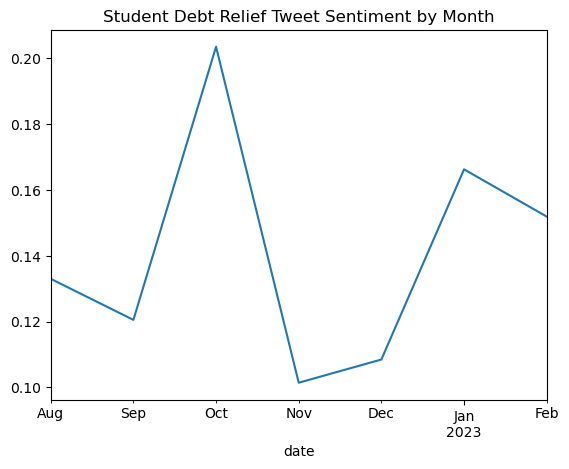

In [86]:
tweets_df.resample('M')['sentiment_score'].mean().plot(
    title="Student Debt Relief Tweet Sentiment by Month");

We can also `.resample()` by day ('D'), week ('W'), or year ('Y').

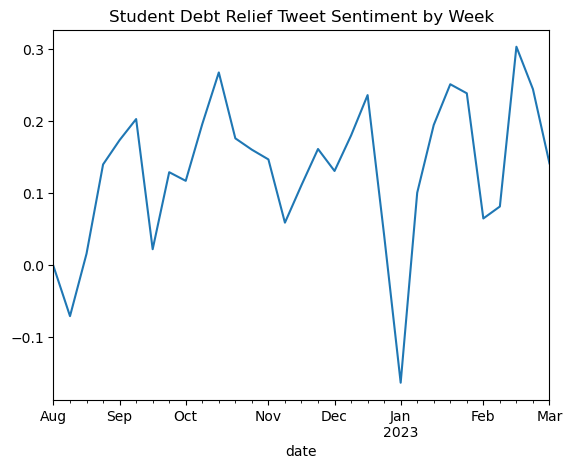

In [87]:
tweets_df.resample('W')['sentiment_score'].mean().plot(
    title="Student Debt Relief Tweet Sentiment by Week");

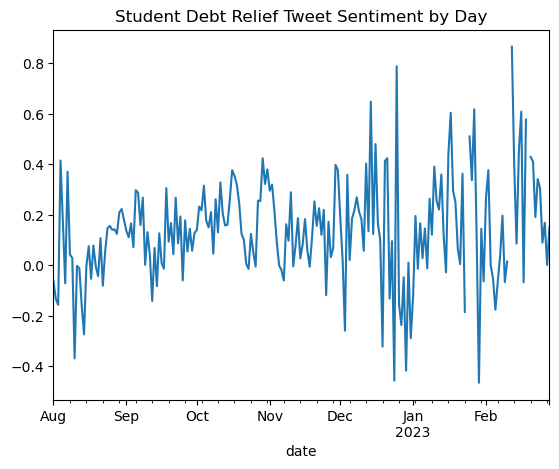

In [88]:
tweets_df.resample('D')['sentiment_score'].mean().plot(
    title="Student Debt Relief Tweet Sentiment by Day");

Looks like there's a dip at the end of December. By using `.loc`, we can also zoom in on particular time periods. Let's take a closer look!

/var/folders/x5/71scq8n935q1wrjw4dt64j700000gn/T/ipykernel_39605/2261922823.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



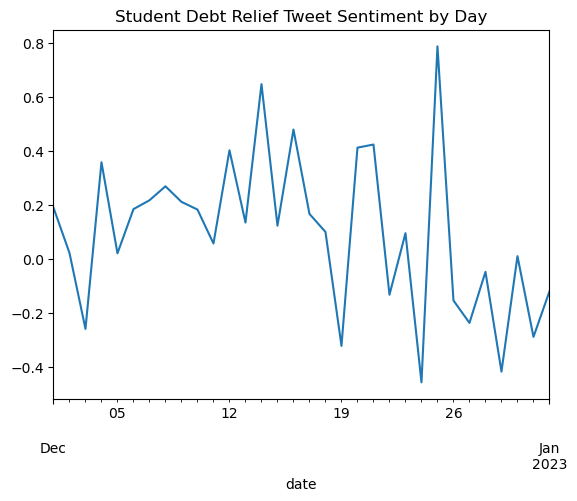

In [89]:
tweets_df.loc["12/1/2022":"1/1/2023"].resample('D')['sentiment_score'].mean().plot(
    title="Student Debt Relief Tweet Sentiment by Day");

In [90]:
tweets_df.loc["12/1/2022":"1/1/2023"].sort_values(by='sentiment_score')[:10]

/var/folders/x5/71scq8n935q1wrjw4dt64j700000gn/T/ipykernel_39605/3444229076.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,text,retweets,sentiment_score
date,,,
2022-12-01 20:02:31,"What’s not “personal injury” about bio terrorist economic dysfunction of time? \n\nExtenuating circumstance gives appropriateness to go above at statuette of limitations.\n\nGo to time out. There’s PLENTY PERSONAL, ECONOMIC, BUSINESS, NATIONAL INJURY \n\nhttps://t.co/fpfldqPa11",0,-0.9008
2022-12-30 15:34:29,"@ninaturner Stick the taxpayers with all student debt, stick the taxpayers with all medical debt. What do you not understand that the word cancel is non existent here. Go to Venezuela, that's where this kind of crap thrives. Pay your own damn bills.",0,-0.8999
2022-12-22 03:02:35,How is it the U.S can spend Well over $100 billion on a war in Ukraine and not support our own people wtf! Shut down the student loan forgiveness that helps us and we pay taxes for what? A war that’s not even in our country ! So over the government spending,0,-0.8762
2022-12-07 17:49:18,"@hank51072 @BlackKnight10k @Mad_as_heII It’s not utopian. Protecting borders, don’t infringe on the 2nd ammendment, not fund foreign interest wars, limit off shoring jobs, stop inclusion policies that descriminate people based on their identity, no student loan forgiveness etc. That’s not utopian, that’s easy",0,-0.8685
2022-12-23 19:01:55,Has anyone been hurt but the student debt pause?\n\nNo one?\n\nNot a soul?\n\nSo CANCEL IT ALL RIGHT NOW,2,-0.8621
2022-12-03 03:09:53,#studentloanforgiveness: #SupremeCourt will hear challenges to the #Biden administration's student loan forgiveness plan. .@BarbaraGarro says it's just plain wrong: gives no windfall to the millions who worked hard to pay theirs off; offers no windfall to poor w/o collage loans! https://t.co/LbDTfmJG6u,0,-0.8516
2023-01-01 06:32:28,"@FizicsMcManus @WillBonds007 Biden still wants student debt relief but Republicans are suing to stop it. So no Will, he hasn’t forgotten. But you are the winner of the dumbest troll on Twitter today!",0,-0.8512
2022-12-19 19:01:23,"The people who are outraged at student loan forgiveness are the same people who are outraged at even the mention of reparations for slavery. I think about that a lot…\n\nI mean it’s a moral outrage to not repay a $10,000 loan but billions of dollars of theft debt we’re okay with?",0,-0.8360
2022-12-10 18:19:57,"The 🤡s campaining 4 president think we're stupid!! Address REAL issues affecting the masses, not just the 1% !! \n\n#ReparationsNow #prisonreform #affordablehousing #healthcareforall #studentloanforgiveness #investineducation #prochoice #guncontrol #education #poverty",0,-0.8346


## Calculate Sentiment Scores for a State of the Union Address

In this section, we are going to calculate sentiment scores for President Biden's 2023 State of the Union Address. 

First, we need use web scraping tools to collect the transcript from the 2023 State of the Union Address. This White House [URL](https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/07/remarks-of-president-joe-biden-state-of-the-union-address-as-prepared-for-delivery/) contains the complete transcript. 

To start, we need to bring in our "requests" library into our Python environment and next we can make our data request using the URL:

In [91]:
import requests

In [92]:
response = requests.get("https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/07/remarks-of-president-joe-biden-state-of-the-union-address-as-prepared-for-delivery/")

Next, we can check to see whether or not the request was successful:

In [93]:
response

<Response [200]>

In order to get the text data from the response we need to apply the .text method, and we can save the results in a new varibale hltm_string. The results from the data request will be in [HTML format](https://www.udacity.com/blog/2021/04/html-for-dummies.html).

In [94]:
html_string = response.text
print(html_string)

<!doctype html>
<html class="no-js alert__has-cookie" lang="en-US">
<head>
	<meta charset="utf-8">
	<meta name="google" content="notranslate">
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<meta name="viewport" content="width=device-width, initial-scale=1">
	<link rel="profile" href="https://gmpg.org/xfn/11">
	
	<!-- If you're reading this, we need your help building back better. https://usds.gov/ -->
<meta name='robots' content='index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1' />

	<title>Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House</title>
	<link rel="canonical" href="https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/07/remarks-of-president-joe-biden-state-of-the-union-address-as-prepared-for-delivery/" />
	<meta property="og:locale" content="en_US" />
	<meta property="og:type" content="article" />
	<meta property="og:title" content="Remarks of President Joe Biden – State 

Let's bring in our [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) Python library to help us clean up and decode this HTML text data:

In [95]:
from bs4 import BeautifulSoup

Let's run our html_string variable through the Beautiful Soup object and use the get_text() function to extract the text from the HTML data. Then, let's use the print function to visualize our results:

In [96]:
soup = BeautifulSoup(html_string)
speech = soup.get_text()
print(speech)










Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House













































Skip to content


You have JavaScript disabled. Please enable JavaScript to use this feature.



Toggle High Contrast




		Toggle High Contrast	






Toggle Large Font Size




		Toggle Large Font Size	















The White House


The White House
 




The White House




































								Home							


Administration
Priorities
The Record
Briefing Room
Español
 



InstagramOpens in a new window
FacebookOpens in a new window
TwitterOpens in a new window
YouTubeOpens in a new window
 


Contact Us
Privacy Policy
Copyright Policy
Accessibility Statement
 









Menu
Close








To search this site, enter a search term

 


Search






Mobile Menu Overlay







































Administration

Show submenu for “Administration””


President Joe Biden
Vice President Kamala Harris
First

Let's save our results in a text file:

In [97]:
with open("2023_union.txt","w") as file:
    file.write(speech)

Next, let's read in the text file and also replace line breaks with spaces to because there are line breaks in the middle of sentences.

In [98]:
# Read in text file
text = open("2023_union.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

### Import NLTK

Next we need to break the text into sentences.

An easy way to break text into sentences, or to "tokenize" them into sentences, is to use [NLTK](https://www.nltk.org/), a Python library for text analysis natural language processing.

Let's import nltk and download the model that will help us get sentences.

In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccakrisel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

To break a string into individual sentences, we can use `nltk.sent_tokenize()`

In [100]:
nltk.sent_tokenize(text)

['         Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House                                              Skip to content   You have JavaScript disabled.',
 'Please enable JavaScript to use this feature.',
 'Toggle High Contrast     \t\tToggle High Contrast\t       Toggle Large Font Size     \t\tToggle Large Font Size\t                The White House   The White House       The White House                                     \t\t\t\t\t\t\t\tHome\t\t\t\t\t\t\t   Administration Priorities The Record Briefing Room Español      InstagramOpens in a new window FacebookOpens in a new window TwitterOpens in a new window YouTubeOpens in a new window     Contact Us Privacy Policy Copyright Policy Accessibility Statement            Menu Close         To search this site, enter a search term      Search       Mobile Menu Overlay                                        Administration  Show submenu for “Administration””   President Joe Biden Vice P

To get sentence numbers for each sentence, we can use `enumerate()`.

In [101]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0          Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House                                              Skip to content   You have JavaScript disabled.
1 Please enable JavaScript to use this feature.
2 Toggle High Contrast     		Toggle High Contrast	       Toggle Large Font Size     		Toggle Large Font Size	                The White House   The White House       The White House                                     								Home							   Administration Priorities The Record Briefing Room Español      InstagramOpens in a new window FacebookOpens in a new window TwitterOpens in a new window YouTubeOpens in a new window     Contact Us Privacy Policy Copyright Policy Accessibility Statement            Menu Close         To search this site, enter a search term      Search       Mobile Menu Overlay                                        Administration  Show submenu for “Administration””   President Joe Biden Vice President Kamala Harris Fi

### Make DataFrame

For convenience, we can put all of the sentences into a pandas DataFrame. One easy way to make a DataFrame is to first make a list of dictionaries.

Below we loop through the sentences, calculate sentiment scores, and then create a dictionary with the sentence, sentence number, and compound score, which we append to the list `sentence_scores`.

In [102]:
# Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

To make this list of dictionaries into a DataFrame, we can simply use `pd.DataFrame()`

In [103]:
pd.DataFrame(sentence_scores)

,sentence,sentence_number,sentiment_score
0,Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House Skip to content You have JavaScript disabled.,1,0.2263
1,Please enable JavaScript to use this feature.,2,0.3182
2,Toggle High Contrast \t\tToggle High Contrast\t Toggle Large Font Size \t\tToggle Large Font Size\t The White House The White House The White House \t\t\t\t\t\t\t\tHome\t\t\t\t\t\t\t Administration Priorities The Record Briefing Room Español InstagramOpens in a new window FacebookOpens in a new window TwitterOpens ...,3,0.9201
3,Madam Vice President.,4,0.0000
4,Our First Lady and Second Gentleman.,5,0.0000
...,...,...,...
562,May God protect our troops.,563,0.5719
563,"### \t\t\t\t\tNext Post: Excerpts from President Biden's State of the Union Address as Prepared for Delivery\t\t\t\t \t\t\t\tExcerpts from President Biden's State of the Union Address as Prepared for Delivery\t\t\t February 07, 2023 • Speeches and Remarks \t\t\t\t\t\tNext\t\t\t\t\t\tPost Stay Connected Sign Up Email Address* Required ZIP Code Please ...",564,0.5994
564,"We'll be in touch with the latest information on how President Biden and his administration are working for the American people, as well as ways you can get involved and help our country build back better.",565,0.7717
565,Opt in to send and receive text messages from President Biden.,566,0.0000


Let's examine the 10 most negative sentences.

In [104]:
# Assign DataFrame to variable red_df
speech_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
speech_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score
414,"A murderous assault, evoking images of the death and destruction Europe suffered in World War II.",415,-0.9741
338,"Now, let’s triple our anti-fraud strike forces going after these criminals, double the statute of limitations on these crimes, and crack down on identity fraud by criminal syndicates stealing billions of dollars from the American people.",339,-0.9442
371,"More resources to reduce violent crime and gun crime; more community intervention programs; more investments in housing, education, and job training.",372,-0.9231
345,There are no words to describe the heartbreak and grief of losing a child.,346,-0.8934
490,Our goal is to cut the cancer death rate by at least 50% over the next 25 years.,491,-0.8860
393,Ban assault weapons once and for all.,394,-0.8834
398,Let’s finish the job and ban assault weapons again.,399,-0.8834
451,"America is rallying the world again to meet those challenges, from climate and global health, to food insecurity, to terrorism and territorial aggression.",452,-0.8519
413,"I spoke from this chamber one year ago, just days after Vladimir Putin unleashed his brutal war against Ukraine.",414,-0.8402
481,"When millions of young people are struggling with bullying, violence, trauma, we owe them greater access to mental health care at school.",482,-0.8360


Let's examine the 10 most positive sentences.

In [105]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
speech_df.sort_values(by='sentiment_score', ascending=False)[:10]

,sentence,sentence_number,sentiment_score
354,"With faith in God, she said her son “was a beautiful soul and something good will come from this.” Imagine how much courage and character that takes.",355,0.9313
557,"Because the soul of this nation is strong, because the backbone of this nation is strong, because the people of this nation are strong, the State of the Union is strong.",558,0.9217
2,Toggle High Contrast \t\tToggle High Contrast\t Toggle Large Font Size \t\tToggle Large Font Size\t The White House The White House The White House \t\t\t\t\t\t\t\tHome\t\t\t\t\t\t\t Administration Priorities The Record Briefing Room Español InstagramOpens in a new window FacebookOpens in a new window TwitterOpens ...,3,0.9201
103,"But to maintain the strongest economy in the world, we also need the best infrastructure in the world.",104,0.8922
153,"With the Inflation Reduction Act that I signed into law, we’re taking on powerful interests to bring your health care costs down so you can sleep better at night.",154,0.8720
232,"Let us commit here tonight that the full faith and credit of the United States of America will never, ever be questioned.",233,0.8656
566,Share Share this page on Facebook Share this page on Twitter https://www.whitehouse.gov/briefing-room/speeches-remarks/2023/02/07/remarks-of-president-joe-biden-state-of-the-union-address-as-prepared-for-delivery/?utm_source=link Home The Administration Executive Offices Priorities The Record Briefing Room The White House Disclosures Get Involved Español Cont...,567,0.8402
369,"Give law enforcement the training they need, hold them to higher standards, and help them succeed in keeping everyone safe.",370,0.8316
113,I sincerely thank my Republican friends who voted for the law.,114,0.8271
407,The Vice President and I are doing everything we can to protect access to reproductive health care and safeguard patient privacy.,408,0.8126


### Make a Sentiment Plot

To create a data visualization of sentiment over the course of the 2023 State of the Union Address we can plot the sentiment scores over story time (aka sentence number).

In [106]:
import plotly.express as px

In [107]:
fig = px.line(speech_df, x='sentence_number', y="sentiment_score",
             title= "Sentiment Analysis of 2023 State of the Union Address")
fig.show()

We can also get a more generalized view by getting a "rolling average" 5 sentences at a time by using the `.rolling()` method with a specified window and storing the results in a new column "speech_roll":

In [108]:
speech_df['speech_roll'] = speech_df.rolling(5)['sentiment_score'].mean()

In [109]:
speech_df[:25]

,sentence,sentence_number,sentiment_score,speech_roll
0,Remarks of President Joe Biden – State of the Union Address as Prepared for Delivery | The White House Skip to content You have JavaScript disabled.,1,0.2263,NaN
1,Please enable JavaScript to use this feature.,2,0.3182,NaN
2,Toggle High Contrast \t\tToggle High Contrast\t Toggle Large Font Size \t\tToggle Large Font Size\t The White House The White House The White House \t\t\t\t\t\t\t\tHome\t\t\t\t\t\t\t Administration Priorities The Record Briefing Room Español InstagramOpens in a new window FacebookOpens in a new window TwitterOpens ...,3,0.9201,NaN
3,Madam Vice President.,4,0.0000,NaN
4,Our First Lady and Second Gentleman.,5,0.0000,0.29292
5,Members of Congress and the Cabinet.,6,0.0000,0.24766
6,Leaders of our military.,7,0.0000,0.18402
7,"Mr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.",8,0.7906,0.15812
8,"And you, my fellow Americans.",9,0.0000,0.15812
9,"I start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.",10,0.0000,0.15812


In [110]:
fig = px.line(speech_df, x='sentence_number', y="speech_roll",
             title= "Sentiment Analysis of 2023 State of the Union Address")
fig.show()